# Taxi Trip Time Prediction

#### Group H
    Sonam Rathod
    Dimple Pinnam
    Alex
    Vignesh

### Problem Statement

Build a predictive framework that is able to infer the trip time of taxi rides in Porto, Portugal

### Dataset Description

https://www.kaggle.com/c/pkdd-15-taxi-trip-time-prediction-ii/data

Each data sample corresponds to one completed trip. It contains a total of
9 (nine) features, described as follows:

TRIP_ID: (String) It contains an unique identifier for each trip;

CALL_TYPE: (char) It identifies the way used to demand this service. It may contain one of three possible values:
‘A’ if this trip was dispatched from the central;
‘B’ if this trip was demanded directly to a taxi driver on a specific stand;
‘C’ otherwise (i.e. a trip demanded on a random street).

ORIGIN_CALL: (integer) It contains an unique identifier for each phone number which was used to demand, at least, one service. It identifies the trip’s customer if CALL_TYPE=’A’. Otherwise, it assumes a NULL value;

ORIGIN_STAND: (integer): It contains an unique identifier for the taxi stand. It identifies the starting point of the trip if
CALL_TYPE=’B’. Otherwise, it assumes a NULL value;

TAXI_ID: (integer): It contains an unique identifier for the taxi driver that performed each trip;

TIMESTAMP: (integer) Unix Timestamp (in seconds). It identifies the trip’s start;

DAYTYPE: (char) It identifies the daytype of the trip’s start. It assumes one of three possible values:
‘B’ if this trip started on a holiday or any other special day (i.e. extending holidays, floating holidays, etc.);
‘C’ if the trip started on a day before a type-B day;
‘A’ otherwise (i.e. a normal day, workday or weekend).

MISSING_DATA: (Boolean) It is FALSE when the GPS data stream is complete and TRUE whenever one (or more) locations are missing

POLYLINE: (String): It contains a list of GPS coordinates (i.e. WGS84 format) mapped as a string. The beginning and the end of the string are identified with brackets (i.e. [ and ], respectively). Each pair of coordinates is also identified by the same brackets as [LONGITUDE, LATITUDE]. This list contains one pair of coordinates for each 15 seconds of trip. The last list item corresponds to the trip’s destination while the first one represents its start;

The total travel time of the trip (the prediction target of this competition) is defined as the (number of points-1) x 15 seconds. For example, a trip with 101 data points in POLYLINE has a length of (101-1) * 15 = 1500 seconds. Some trips have missing data points in POLYLINE, indicated by MISSING_DATA column, and it is part of the challenge how you utilize this knowledge.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [28]:
import pandas as pd

train_data_path = '/content/drive/MyDrive/ColabNotebooks/train.csv'
test_data_path = '/content/drive/MyDrive/ColabNotebooks/test.csv'

# Load the data into pandas DataFrames
train_full = pd.read_csv(train_data_path)
train = train_full.sample(n=50000, random_state=42)
test = pd.read_csv(test_data_path)

train.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
1414161,1399190091620000213,B,NaN,10.0,20000213,1399190091,A,False,"[[-8.607096,41.150286],[-8.607123,41.150214],[..."
1397309,1398928351620000092,C,NaN,NaN,20000092,1398928351,A,False,"[[-8.638533,41.159133],[-8.63856,41.15907],[-8..."
560966,1383056851620000263,B,NaN,9.0,20000263,1383056851,A,False,"[[-8.60652,41.144562],[-8.606934,41.144724],[-..."
1453634,1399758505620000503,B,NaN,13.0,20000503,1399758505,A,False,"[[-8.628246,41.157333],[-8.627733,41.157657],[..."
975156,1390920415620000174,B,NaN,10.0,20000174,1390920415,A,False,"[[-8.607123,41.150331],[-8.607114,41.150295],[..."


### Exploratory Data Analysis
### Dataset Information

In [29]:
# Display information about the datasets
print("Train Dataset Info:")
print(train.info())

print("\nTest Dataset Info:")
print(test.info())

# Display the first few rows of each dataset for inspection
print("\nFirst few rows of the Train Dataset:")
print(train.head())

print("\nFirst few rows of the Test Dataset:")
print(test.head())

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 1414161 to 1151548
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TRIP_ID       50000 non-null  int64  
 1   CALL_TYPE     50000 non-null  object 
 2   ORIGIN_CALL   10697 non-null  float64
 3   ORIGIN_STAND  23393 non-null  float64
 4   TAXI_ID       50000 non-null  int64  
 5   TIMESTAMP     50000 non-null  int64  
 6   DAY_TYPE      50000 non-null  object 
 7   MISSING_DATA  50000 non-null  bool   
 8   POLYLINE      50000 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 3.5+ MB
None

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TRIP_ID       320 non-null    object 
 1   CALL_TYPE     320 non-null    object 
 2   ORIGIN_CALL   72 no

### Duplicate Data

In [30]:
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

### Check Missing Values

In [31]:
# Calculate percentage of missing data per column for train and test datasets
train_missing_percent = train.isnull().mean() * 100
test_missing_percent = test.isnull().mean() * 100

# Calculate overall percentage of missing data in train and test datasets
train_total_missing_percent = train.isnull().sum().sum() / (train.shape[0] * train.shape[1]) * 100
test_total_missing_percent = test.isnull().sum().sum() / (test.shape[0] * test.shape[1]) * 100

# Display the results
print("Percentage of missing data per column in Train Dataset:")
print(train_missing_percent)

print("\nOverall percentage of missing data in Train Dataset:")
print(f"{train_total_missing_percent:.2f}%")

print("\nPercentage of missing data per column in Test Dataset:")
print(test_missing_percent)

print("\nOverall percentage of missing data in Test Dataset:")
print(f"{test_total_missing_percent:.2f}%")

Percentage of missing data per column in Train Dataset:
TRIP_ID          0.000
CALL_TYPE        0.000
ORIGIN_CALL     78.606
ORIGIN_STAND    53.214
TAXI_ID          0.000
TIMESTAMP        0.000
DAY_TYPE         0.000
MISSING_DATA     0.000
POLYLINE         0.000
dtype: float64

Overall percentage of missing data in Train Dataset:
14.65%

Percentage of missing data per column in Test Dataset:
TRIP_ID          0.0000
CALL_TYPE        0.0000
ORIGIN_CALL     77.5000
ORIGIN_STAND    61.5625
TAXI_ID          0.0000
TIMESTAMP        0.0000
DAY_TYPE         0.0000
MISSING_DATA     0.0000
POLYLINE         0.0000
dtype: float64

Overall percentage of missing data in Test Dataset:
15.45%


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

missing_count = train['MISSING_DATA'].sum()
print(f'{missing_count} Number of times the GPS track the trip.')
missing_call = train['ORIGIN_CALL'].isnull().sum()
missing_count = train['ORIGIN_STAND'].isnull().sum()
print(f'Missing Original Call : {missing_call}')
print(f'Missing Original stand : {missing_count}')

unique_calls = train['ORIGIN_CALL'].nunique()
unique_stands = train['ORIGIN_STAND'].nunique()

print(f'Number of unique calls made :  {unique_calls}')
print(f'Number of taxi stand where customer was picked : {unique_stands}')

1 Number of times the GPS track the trip.
Missing Original Call : 39303
Missing Original stand : 26607
Number of unique calls made :  6132
Number of taxi stand where customer was picked : 61


### Data Preprocessing
##### Convert the Unix timestamps to human-readable dates and extracting temporal features

In [33]:
train['DATETIME'] = pd.to_datetime(train['TIMESTAMP'], unit='s')
test['DATETIME'] = pd.to_datetime(test['TIMESTAMP'], unit='s')
train['HOUR'] = train['DATETIME'].dt.hour
train['DAY_OF_WEEK'] = train['DATETIME'].dt.dayofweek  # Monday=0, Sunday=6
train['MONTH'] = train['DATETIME'].dt.month
train['WEEK_OF_YEAR'] = train['DATETIME'].dt.isocalendar().week.astype(int)

test['HOUR'] = test['DATETIME'].dt.hour
test['DAY_OF_WEEK'] = test['DATETIME'].dt.dayofweek
test['MONTH'] = test['DATETIME'].dt.month
test['WEEK_OF_YEAR'] = test['DATETIME'].dt.isocalendar().week.astype(int)

#### Extract Spatial Features from POLYLINE

Start coordinates
End coordinates (for training only, as test is partial)
Distance traveled (for training)
Average speed (for training)
For partial polylines in the test set, you may want to just extract start and last-known coordinates.

#### Compute Haversine Distance
The haversine formula is used to calculate the great-circle distance between two points on a sphere from their longitudes and latitudes.

#### Calculte bearing distance
Bearing refers to the direction from one point to another point on the Earth’s surface, usually expressed as an angle relative to north.

In [34]:

import pandas as pd
import numpy as np
from math import radians, sin, cos, sqrt, atan2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
import matplotlib.pyplot as plt
import seaborn as sns
import json
# Constants for the city center (example: Porto, Portugal)
CITY_CENTER_LAT = 41.1579  # Latitude of Porto city center
CITY_CENTER_LON = -8.6291  # Longitude of Porto city center

# Haversine formula to calculate the great-circle distance
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in kilometers
    d_lat = radians(lat2 - lat1)
    d_lon = radians(lon2 - lon1)
    a = sin(d_lat/2) * sin(d_lat/2) + cos(radians(lat1)) * cos(radians(lat2)) * sin(d_lon/2) * sin(d_lon/2)
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

# Bearing formula to calculate heading
def calculate_bearing(lat1, lon1, lat2, lon2):
    d_lon = radians(lon2 - lon1)
    y = sin(d_lon) * cos(radians(lat2))
    x = cos(radians(lat1)) * sin(radians(lat2)) - sin(radians(lat1)) * cos(radians(lat2)) * cos(d_lon)
    bearing = atan2(y, x)
    return (bearing + 360) % 360  # Normalize to 0-360 degrees

def extract_features(row):
    polyline = json.loads(row['POLYLINE'])
    if len(polyline) < 2:  # Incomplete trips
        return pd.Series([None] * 12)

    # Start and cutoff coordinates
    start = polyline[0]
    cutoff = polyline[-1]
    start_lon, start_lat = start
    cutoff_lon, cutoff_lat = cutoff

    # Trip length (number of points in POLYLINE - 1) * 15 seconds
    trip_length = (len(polyline) - 1) * 15

    # Distance and heading calculations
    dist_to_center = haversine(start_lat, start_lon, CITY_CENTER_LAT, CITY_CENTER_LON)
    heading_to_center = calculate_bearing(start_lat, start_lon, CITY_CENTER_LAT, CITY_CENTER_LON)

    dist_center_to_cutoff = haversine(CITY_CENTER_LAT, CITY_CENTER_LON, cutoff_lat, cutoff_lon)
    heading_from_center = calculate_bearing(CITY_CENTER_LAT, CITY_CENTER_LON, cutoff_lat, cutoff_lon)

    net_distance_to_cutoff = dist_to_center - dist_center_to_cutoff

    trip_distance = haversine(start_lat, start_lon, cutoff_lat, cutoff_lon)
    median_velocity = trip_distance / (trip_length / 3600) if trip_length > 0 else None  # km/h

    velocity_at_cutoff = (15 / trip_distance) * 3600 if trip_distance > 0 else None  # km/h
    heading_at_cutoff = calculate_bearing(start_lat, start_lon, cutoff_lat, cutoff_lon)

    return pd.Series([
        start_lat, start_lon, cutoff_lat, cutoff_lon,
        dist_to_center, heading_to_center,
        dist_center_to_cutoff, heading_from_center,
        net_distance_to_cutoff, median_velocity,
        velocity_at_cutoff, heading_at_cutoff
    ])



##### Handle Missing Values and process Categorical Features

In [35]:
#Map CALL_TYPE values to numeric codes
map_call = {"A": 1, "B": 2, "C": 3}
train["CALL_TYPE"] = train["CALL_TYPE"].map(map_call)

# Convert ORIGIN_CALL to a binary flag: 1 if not None, 0 if None
def origin_call_flg(x):
    return 0 if x["ORIGIN_CALL"] is None else 1
train["ORIGIN_CALL"] = train.apply(origin_call_flg, axis=1)

# Convert ORIGIN_STAND to a binary flag: 1 if not None, 0 if None
def origin_stand_flg(x):
    return 0 if x["ORIGIN_STAND"] is None else 1
train["ORIGIN_STAND"] = train.apply(origin_stand_flg, axis=1)

# Drop DAY_TYPE column if it provides no variability
if "DAY_TYPE" in train.columns:
    train.drop("DAY_TYPE", axis=1, inplace=True)

# Convert MISSING_DATA to a binary flag: 0 if "False", 1 otherwise
def miss_flg(x):
    return 0 if x["MISSING_DATA"] == "False" else 1
train["MISSING_DATA"] = train.apply(miss_flg, axis=1)

# Make Call Type dummy Variables
train = pd.get_dummies(train, columns=['CALL_TYPE'], prefix=[ 'CALL_TYPE'])
one_hot_columns = [col for col in train.columns if col.startswith('CALL_TYPE')]

train[one_hot_columns] = train[one_hot_columns].astype(int)

# Convert ORIGIN_CALL to a binary flag: 1 if not None, 0 if None
def origin_call_flg(x):
    return 0 if x["ORIGIN_CALL"] is None else 1
test["ORIGIN_CALL"] = test.apply(origin_call_flg, axis=1)

# Convert ORIGIN_STAND to a binary flag: 1 if not None, 0 if None
def origin_stand_flg(x):
    return 0 if x["ORIGIN_STAND"] is None else 1
test["ORIGIN_STAND"] = test.apply(origin_stand_flg, axis=1)

# Drop DAY_TYPE column if it provides no variability
if "DAY_TYPE" in test.columns:
    test.drop("DAY_TYPE", axis=1, inplace=True)

# Convert MISSING_DATA to a binary flag: 0 if "False", 1 otherwise
def miss_flg(x):
    return 0 if x["MISSING_DATA"] == "False" else 1
test["MISSING_DATA"] = test.apply(miss_flg, axis=1)

test = pd.get_dummies(test, columns=['CALL_TYPE'], prefix=[ 'CALL_TYPE'])
one_hot_columns = [col for col in test.columns if col.startswith('CALL_TYPE')]

test[one_hot_columns] = test[one_hot_columns].astype(int)

In [37]:
# Define feature names
feature_names = [
    'START_LAT', 'START_LON', 'CUTOFF_LAT', 'CUTOFF_LON',
    'DIST_TO_CENTER', 'HEADING_TO_CENTER',
    'DIST_CENTER_TO_CUTOFF', 'HEADING_FROM_CENTER',
    'NET_DIST_TO_CUTOFF', 'MEDIAN_VELOCITY',
    'VELOCITY_AT_CUTOFF', 'HEADING_AT_CUTOFF'
]

# Apply the feature extraction to both train and test datasets
train[feature_names] = train.apply(extract_features, axis=1)
test[feature_names] = test.apply(extract_features, axis=1)

print(train.head())


                     TRIP_ID  ORIGIN_CALL  ORIGIN_STAND   TAXI_ID   TIMESTAMP  \
1414161  1399190091620000213            1             1  20000213  1399190091   
1397309  1398928351620000092            1             1  20000092  1398928351   
560966   1383056851620000263            1             1  20000263  1383056851   
1453634  1399758505620000503            1             1  20000503  1399758505   
975156   1390920415620000174            1             1  20000174  1390920415   

         MISSING_DATA                                           POLYLINE  \
1414161             1  [[-8.607096,41.150286],[-8.607123,41.150214],[...   
1397309             1  [[-8.638533,41.159133],[-8.63856,41.15907],[-8...   
560966              1  [[-8.60652,41.144562],[-8.606934,41.144724],[-...   
1453634             1  [[-8.628246,41.157333],[-8.627733,41.157657],[...   
975156              1  [[-8.607123,41.150331],[-8.607114,41.150295],[...   

                   DATETIME  HOUR  DAY_OF_WEEK  ...  CUT

In [38]:
# Calculate percentage of missing data per column for train and test datasets
train_missing_percent = train.isnull().mean() * 100
test_missing_percent = test.isnull().mean() * 100

# Calculate overall percentage of missing data in train and test datasets
train_total_missing_percent = train.isnull().sum().sum() / (train.shape[0] * train.shape[1]) * 100
test_total_missing_percent = test.isnull().sum().sum() / (test.shape[0] * test.shape[1]) * 100

# Display the results
print("Percentage of missing data per column in Train Dataset:")
print(train_missing_percent)

print("\nOverall percentage of missing data in Train Dataset:")
print(f"{train_total_missing_percent:.2f}%")

print("\nPercentage of missing data per column in Test Dataset:")
print(test_missing_percent)

print("\nOverall percentage of missing data in Test Dataset:")
print(f"{test_total_missing_percent:.2f}%")

Percentage of missing data per column in Train Dataset:
TRIP_ID                  0.000
ORIGIN_CALL              0.000
ORIGIN_STAND             0.000
TAXI_ID                  0.000
TIMESTAMP                0.000
MISSING_DATA             0.000
POLYLINE                 0.000
DATETIME                 0.000
HOUR                     0.000
DAY_OF_WEEK              0.000
MONTH                    0.000
WEEK_OF_YEAR             0.000
CALL_TYPE_1              0.000
CALL_TYPE_2              0.000
CALL_TYPE_3              0.000
START_LAT                2.164
START_LON                2.164
CUTOFF_LAT               2.164
CUTOFF_LON               2.164
DIST_TO_CENTER           2.164
HEADING_TO_CENTER        2.164
DIST_CENTER_TO_CUTOFF    2.164
HEADING_FROM_CENTER      2.164
NET_DIST_TO_CUTOFF       2.164
MEDIAN_VELOCITY          2.164
VELOCITY_AT_CUTOFF       2.178
HEADING_AT_CUTOFF        2.164
dtype: float64

Overall percentage of missing data in Train Dataset:
0.96%

Percentage of missing data per 

##### This code first filters out rows with invalid trips.

In [39]:
# Define invalid trip criteria
def is_invalid_trip(row):
    critical_features = [
        'START_LAT', 'START_LON', 'CUTOFF_LAT', 'CUTOFF_LON',
        'DIST_TO_CENTER', 'HEADING_TO_CENTER',
        'DIST_CENTER_TO_CUTOFF', 'HEADING_FROM_CENTER',
        'NET_DIST_TO_CUTOFF', 'MEDIAN_VELOCITY',
        'VELOCITY_AT_CUTOFF', 'HEADING_AT_CUTOFF'
    ]
    # Missing critical features
    if row[critical_features].isnull().any():
        return True
    # Unrealistic distances or velocities
    if row['DIST_TO_CENTER'] < 0.1 or row['MEDIAN_VELOCITY'] > 150:
        return True
    return False

# Apply the invalid trip criteria to train and test datasets
train['INVALID_TRIP'] = train.apply(is_invalid_trip, axis=1)
test['INVALID_TRIP'] = test.apply(is_invalid_trip, axis=1)

# Drop invalid trips
train = train[~train['INVALID_TRIP']].drop(columns=['INVALID_TRIP'])
test = test[~test['INVALID_TRIP']].drop(columns=['INVALID_TRIP'])


In [40]:
# Calculate percentage of missing data per column for train and test datasets
train_missing_percent = train.isnull().mean() * 100
test_missing_percent = test.isnull().mean() * 100

# Calculate overall percentage of missing data in train and test datasets
train_total_missing_percent = train.isnull().sum().sum() / (train.shape[0] * train.shape[1]) * 100
test_total_missing_percent = test.isnull().sum().sum() / (test.shape[0] * test.shape[1]) * 100

# Display the results
print("Percentage of missing data per column in Train Dataset:")
print(train_missing_percent)

print("\nOverall percentage of missing data in Train Dataset:")
print(f"{train_total_missing_percent:.2f}%")

print("\nPercentage of missing data per column in Test Dataset:")
print(test_missing_percent)

print("\nOverall percentage of missing data in Test Dataset:")
print(f"{test_total_missing_percent:.2f}%")

Percentage of missing data per column in Train Dataset:
TRIP_ID                  0.0
ORIGIN_CALL              0.0
ORIGIN_STAND             0.0
TAXI_ID                  0.0
TIMESTAMP                0.0
MISSING_DATA             0.0
POLYLINE                 0.0
DATETIME                 0.0
HOUR                     0.0
DAY_OF_WEEK              0.0
MONTH                    0.0
WEEK_OF_YEAR             0.0
CALL_TYPE_1              0.0
CALL_TYPE_2              0.0
CALL_TYPE_3              0.0
START_LAT                0.0
START_LON                0.0
CUTOFF_LAT               0.0
CUTOFF_LON               0.0
DIST_TO_CENTER           0.0
HEADING_TO_CENTER        0.0
DIST_CENTER_TO_CUTOFF    0.0
HEADING_FROM_CENTER      0.0
NET_DIST_TO_CUTOFF       0.0
MEDIAN_VELOCITY          0.0
VELOCITY_AT_CUTOFF       0.0
HEADING_AT_CUTOFF        0.0
dtype: float64

Overall percentage of missing data in Train Dataset:
0.00%

Percentage of missing data per column in Test Dataset:
TRIP_ID                  0.0
O

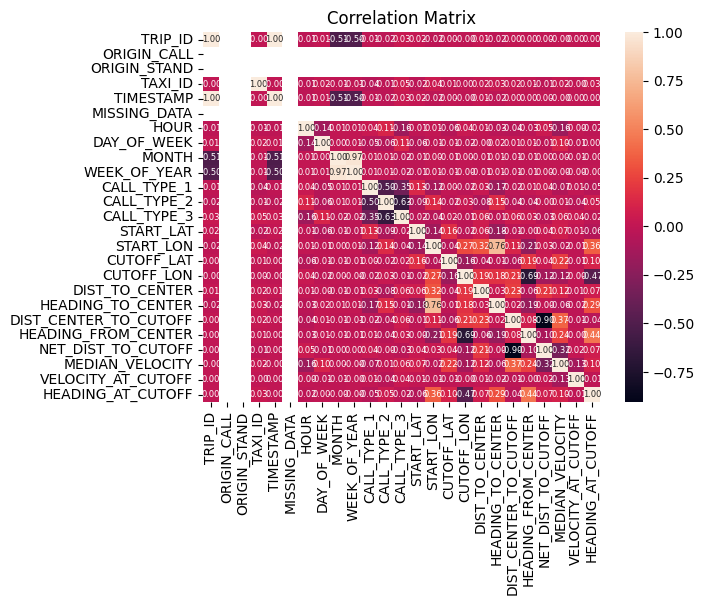

In [41]:
numeric_train = train.select_dtypes(include=[np.number])
corr_matrix = numeric_train.corr()

ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", annot_kws={"size": 6})
plt.title("Correlation Matrix")
plt.show()

### Feature selection, Modeling and Evaluation Metrics

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

feature_names = ['MONTH','DAY_OF_WEEK', 'WEEK_OF_YEAR', 'HOUR', 'START_LAT', 'START_LON', 'CUTOFF_LAT', 'CUTOFF_LON',
    'DIST_TO_CENTER', 'HEADING_TO_CENTER',
    'DIST_CENTER_TO_CUTOFF', 'HEADING_FROM_CENTER',
    'NET_DIST_TO_CUTOFF', 'MEDIAN_VELOCITY',
    'VELOCITY_AT_CUTOFF', 'HEADING_AT_CUTOFF'
    ]
# Define features and target
X_train = train[[*feature_names]]
y_train = (train['POLYLINE'].apply(lambda x: (len(json.loads(x)) - 1) * 15))  # Trip length in seconds

X_test = test[[*feature_names]]

# Split train data for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Random Forest Model

In [43]:
# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_split, y_train_split)

# Evaluate the model
y_pred_val = rf.predict(X_val)
mae_rf = mean_absolute_error(y_val, y_pred_val)
rmse_rf = math.sqrt(mean_squared_error(y_val, y_pred_val))
r2_rf = r2_score(y_val, y_pred_val)

print(f"Validation Train MAE: {mae_rf:.2f} seconds")
print(f"Validation Train RMSE: {rmse_rf:.2f} seconds")
print(f"Validation Train R² Score: {r2_rf:.4f}")

Validation Train MAE: 18.37 seconds
Validation Train RMSE: 291.04 seconds
Validation Train R² Score: 0.8527


In [44]:
# Predict trip durations for the test dataset
test['PREDICTED_TRIP_LENGTH'] = rf.predict(X_test)

# Save predictions to a CSV file
test[['TRIP_ID', 'PREDICTED_TRIP_LENGTH']].to_csv("test_predictions_random.csv", index=False)
print("Test predictions saved to 'test_predictions_random.csv'")

Test predictions saved to 'test_predictions_random.csv'


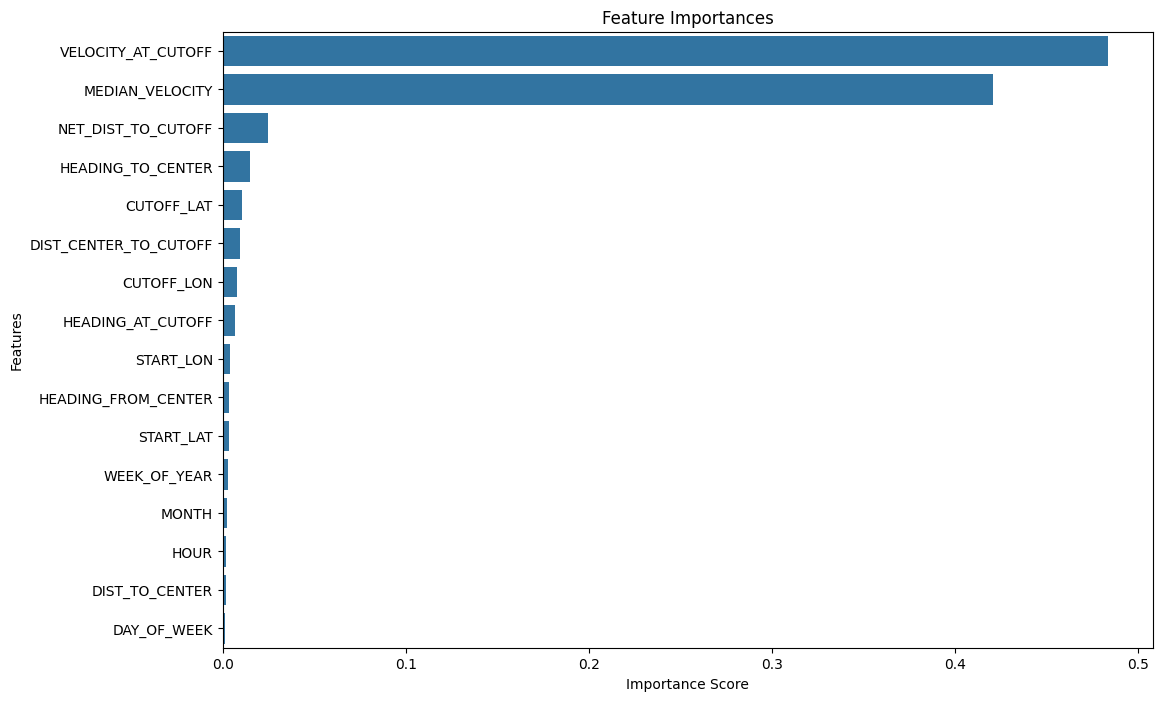

In [45]:

importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


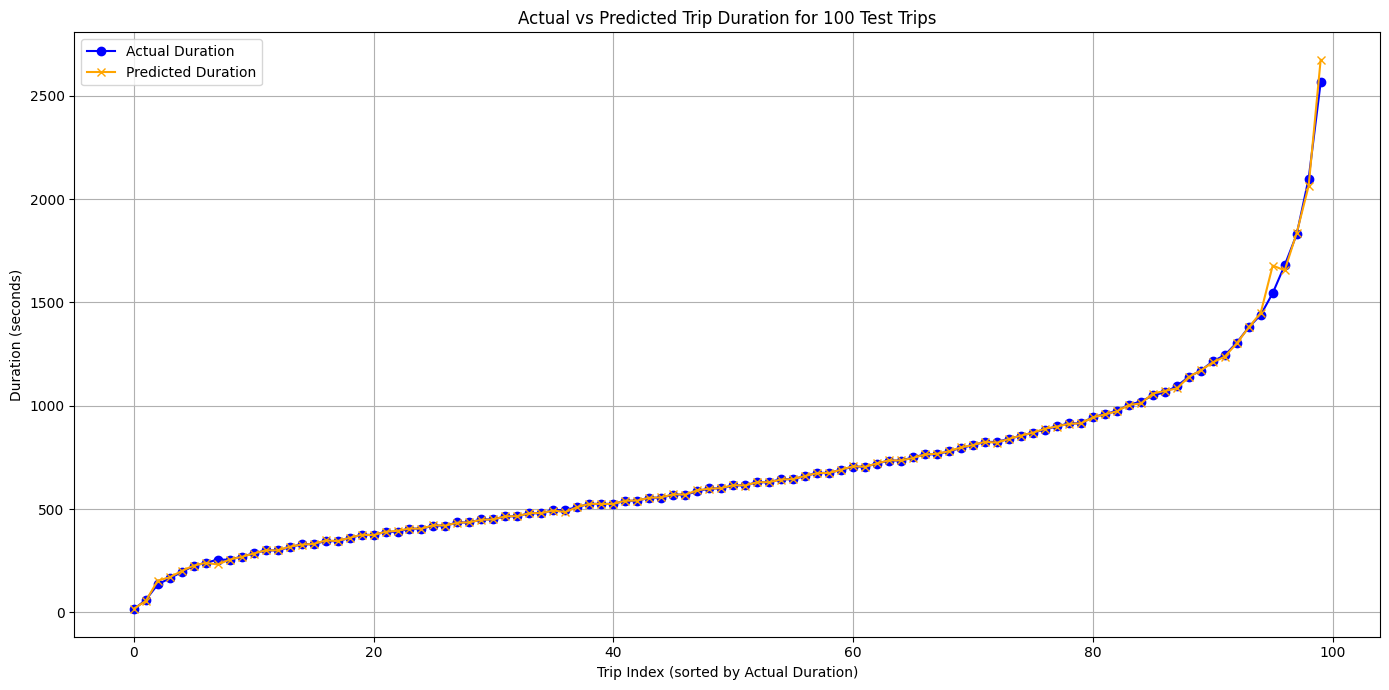

In [46]:
# Combine actual and predicted values into a DataFrame for easier handling
validation_results = pd.DataFrame({
    'Actual_Duration': y_val.reset_index(drop=True),
    'Predicted_Duration': y_pred_val
}).reset_index(drop=True)

# Sort by Actual Duration
validation_results_sorted = validation_results.sort_values(by='Actual_Duration').reset_index(drop=True)

# Sample 100 Equally Spaced Points
sample_size = 100
total_points = len(validation_results_sorted)

# Calculate step size to evenly sample the data
step = max(total_points // sample_size, 1)

# Select indices for sampling
sample_indices = np.arange(0, total_points, step)[:sample_size]

# Extract the sampled data
sampled_validation = validation_results_sorted.iloc[sample_indices].reset_index(drop=True)

# Plot Actual vs Predicted Durations (Line Plot)
plt.figure(figsize=(14, 7))
plt.plot(sampled_validation.index, sampled_validation['Actual_Duration'], label='Actual Duration', color='blue', marker='o')
plt.plot(sampled_validation.index, sampled_validation['Predicted_Duration'], label='Predicted Duration', color='orange', marker='x')
plt.title("Actual vs Predicted Trip Duration for 100 Test Trips")
plt.xlabel("Trip Index (sorted by Actual Duration)")
plt.ylabel("Duration (seconds)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Cross validation for Random Forest Model

In [47]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
import json
import numpy as np

# Define features and target
X = train[[*feature_names]]
y = train['POLYLINE'].apply(lambda x: (len(json.loads(x)) - 1) * 15)  # Trip length in seconds

# Initialize K-Fold Cross-Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store metrics
mae_scores = []
rmse_scores = []
r2_scores = []

# Perform K-Fold Cross-Validation
for fold, (train_index, val_index) in enumerate(kf.split(X)):
    # Split data into training and validation sets for this fold
    X_train_split, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train_split, y_val = y.iloc[train_index], y.iloc[val_index]

    # Train Random Forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_split, y_train_split)

    # Predict on validation set
    y_pred_val = rf.predict(X_val)

    # Calculate metrics
    mae = mean_absolute_error(y_val, y_pred_val)
    rmse = math.sqrt(mean_squared_error(y_val, y_pred_val))
    r2 = r2_score(y_val, y_pred_val)

    # Append metrics for this fold
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    # Print metrics for the fold
    print(f"Fold {fold+1}: MAE = {mae:.2f}, RMSE = {rmse:.2f}, R² = {r2:.4f}")

# Calculate and print average metrics
print("\n--- Cross-Validation Results ---")
print(f"Average MAE: {np.mean(mae_scores):.2f} ± {np.std(mae_scores):.2f} seconds")
print(f"Average RMSE: {np.mean(rmse_scores):.2f} ± {np.std(rmse_scores):.2f} seconds")
print(f"Average R²: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")


Fold 1: MAE = 18.09, RMSE = 291.89, R² = 0.8519
Fold 2: MAE = 11.76, RMSE = 163.83, R² = 0.9340
Fold 3: MAE = 16.48, RMSE = 354.65, R² = 0.7990
Fold 4: MAE = 13.06, RMSE = 173.54, R² = 0.9380
Fold 5: MAE = 15.54, RMSE = 200.88, R² = 0.9229

--- Cross-Validation Results ---
Average MAE: 14.98 ± 2.29 seconds
Average RMSE: 236.96 ± 74.22 seconds
Average R²: 0.8892 ± 0.0549


### GradientBoosting Model

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting model
gb = GradientBoostingRegressor(
    n_estimators=100,  # Number of boosting stages
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,  # Maximum depth of individual estimators
    random_state=42
)

# Train the model
gb.fit(X_train_split, y_train_split)

# Predict on validation data
y_pred_val_gb = gb.predict(X_val)

# Evaluate the model
mae_gb = mean_absolute_error(y_val, y_pred_val_gb)
rmse_gb = math.sqrt(mean_squared_error(y_val, y_pred_val_gb))
r2_gb = r2_score(y_val, y_pred_val_gb)

print(f"Gradient Boosting Validation MAE: {mae_gb:.2f} seconds")
print(f"Gradient Boosting Validation RMSE: {rmse_gb:.2f} seconds")
print(f"Gradient Boosting Validation R² Score: {r2_gb:.4f}")


Gradient Boosting Validation MAE: 50.37 seconds
Gradient Boosting Validation RMSE: 194.75 seconds
Gradient Boosting Validation R² Score: 0.9276


In [49]:
# Predict on test
test['PREDICTED_DURATION'] = gb.predict(X_test)

# Display predictions
print(test[['TRIP_ID', 'PREDICTED_DURATION']].head())

# Optionally, save predictions to a CSV
test[['TRIP_ID', 'PREDICTED_DURATION']].to_csv('predicted_durations_gradient_boosting.csv', index=False)
print("Predictions saved to 'predicted_durations_gradient_boosting.csv'")

  TRIP_ID  PREDICTED_DURATION
0      T1          207.756516
1      T2          610.071937
2      T3          630.766181
3      T4          489.701069
4      T5          127.313041
Predictions saved to 'predicted_durations_gradient_boosting.csv'


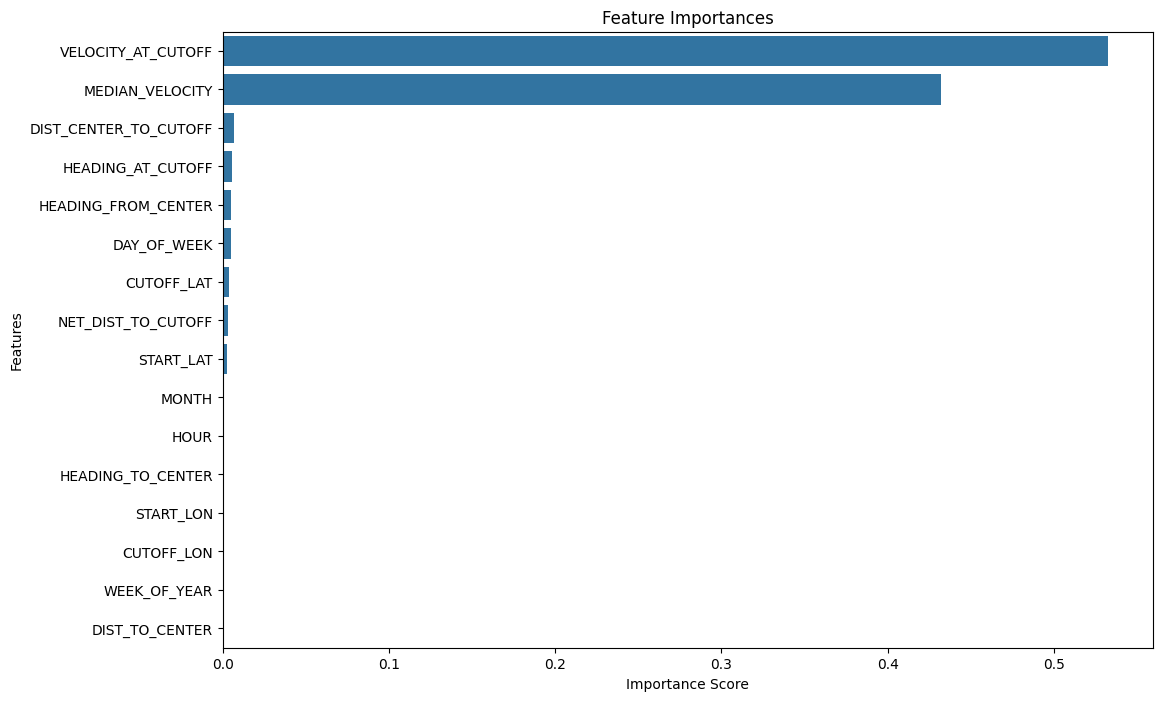

In [50]:

importances = gb.feature_importances_
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


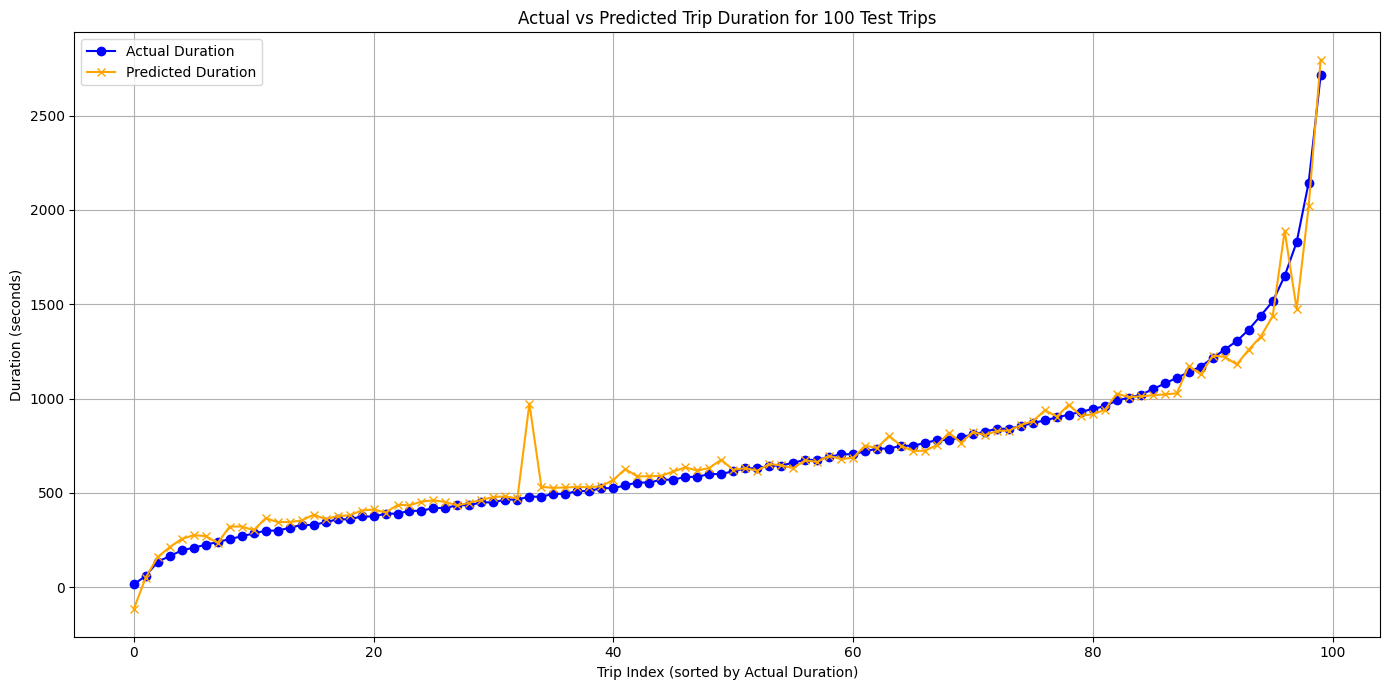

In [51]:
# Combine actual and predicted values into a DataFrame for easier handling
validation_results = pd.DataFrame({
    'Actual_Duration': y_val.reset_index(drop=True),
    'Predicted_Duration': y_pred_val_gb
}).reset_index(drop=True)

# Sort by Actual Duration
validation_results_sorted = validation_results.sort_values(by='Actual_Duration').reset_index(drop=True)

# Sample 100 Equally Spaced Points
sample_size = 100
total_points = len(validation_results_sorted)

# Calculate step size to evenly sample the data
step = max(total_points // sample_size, 1)

# Select indices for sampling
sample_indices = np.arange(0, total_points, step)[:sample_size]

# Extract the sampled data
sampled_validation = validation_results_sorted.iloc[sample_indices].reset_index(drop=True)

# Plot Actual vs Predicted Durations (Line Plot)
plt.figure(figsize=(14, 7))
plt.plot(sampled_validation.index, sampled_validation['Actual_Duration'], label='Actual Duration', color='blue', marker='o')
plt.plot(sampled_validation.index, sampled_validation['Predicted_Duration'], label='Predicted Duration', color='orange', marker='x')
plt.title("Actual vs Predicted Trip Duration for 100 Test Trips")
plt.xlabel("Trip Index (sorted by Actual Duration)")
plt.ylabel("Duration (seconds)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Linear Regression Model

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import SplineTransformer

# Define spline features
spline_features = feature_names  # Replace with your specific continuous columns

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('splines', SplineTransformer(degree=3, n_knots=5), spline_features),
        ('scale', StandardScaler(), spline_features),  # Scale features if necessary
    ],
    remainder='passthrough'  # Pass through other features
)

# Build the pipeline
linear_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline
linear_reg_pipeline.fit(X_train_split, y_train_split)

# Predict and evaluate
y_pred_splines = linear_reg_pipeline.predict(X_val)
mae_splines = mean_absolute_error(y_val, y_pred_splines)
rmse_splines = math.sqrt(mean_squared_error(y_val, y_pred_splines))
r2_splines = r2_score(y_val, y_pred_splines)

# Cross-validation
scores = cross_val_score(linear_reg_pipeline, X_train_split, y_train_split, scoring='neg_mean_squared_error', cv=5)
cv_score_rmse = np.sqrt(-scores.mean())

# Print metrics
print(f"Cross-validated RMSE: {cv_score_rmse:.2f}")
print(f"Validation R-Squared: {r2_splines:.4f}")
print(f"Validation RMSE: {rmse_splines:.2f}")
print(f"Validation MAE: {mae_splines:.2f}")


Cross-validated RMSE: 695635256880.74
Validation R-Squared: -3055293495554483.5000
Validation RMSE: 39995233223.98
Validation MAE: 614026253.82


In [53]:
# Predict on test
test['PREDICTED_DURATION'] = linear_reg_pipeline.predict(X_test)

# Display predictions
print(test[['TRIP_ID', 'PREDICTED_DURATION']].head())

# Optionally, save predictions to a CSV
test[['TRIP_ID', 'PREDICTED_DURATION']].to_csv('predicted_durations_linear_splines.csv', index=False)
print("Predictions saved to 'predicted_durations_linear_splines.csv'")

  TRIP_ID  PREDICTED_DURATION
0      T1         1267.609375
1      T2          506.796875
2      T3          667.046875
3      T4         1340.421875
4      T5          307.296875
Predictions saved to 'predicted_durations_linear_splines.csv'


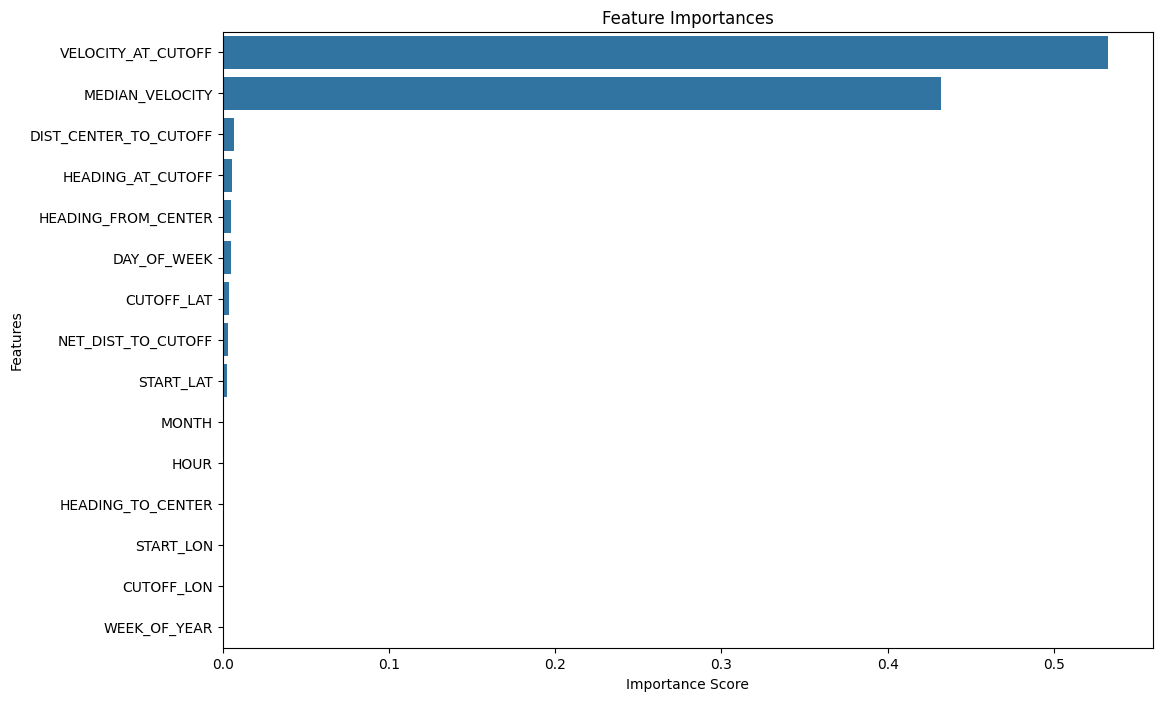

In [54]:
# Access the 'regressor' step within the pipeline, which is your LinearRegression model
importances = linear_reg_pipeline.named_steps['regressor'].coef_

# Get feature names after spline transformation
feature_names_transformed = linear_reg_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Select the top 15 features
top_features = feature_importances.head(15)

# Continue with the rest of your code to plot feature importances
feature_importances = pd.Series(np.abs(importances), index=feature_names_transformed).sort_values(ascending=False) # Taking absolute values for Linear Regression
plt.figure(figsize=(12,8))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

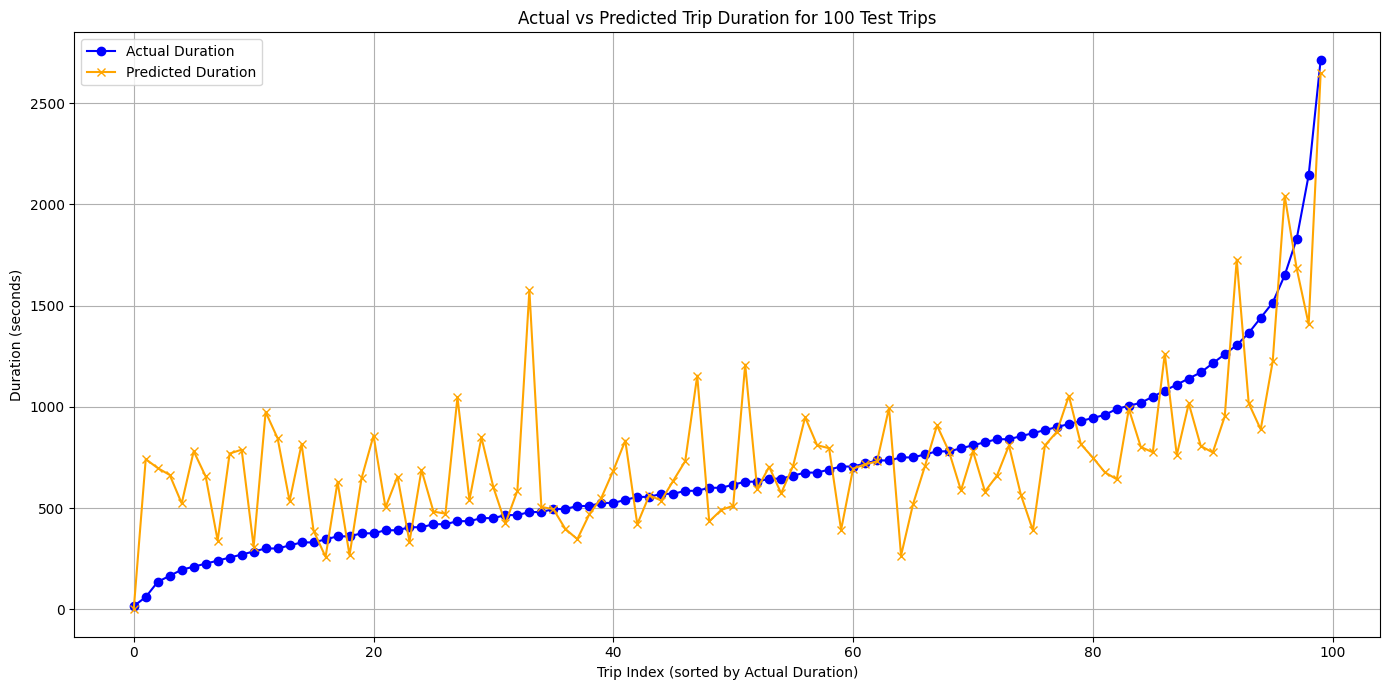

In [55]:
# Combine actual and predicted values into a DataFrame for easier handling
validation_results = pd.DataFrame({
    'Actual_Duration': y_val.reset_index(drop=True)[:len(y_pred_splines)],  # Adjust the length of y_val
    'Predicted_Duration': y_pred_splines
}).reset_index(drop=True)

# Sort by Actual Duration
validation_results_sorted = validation_results.sort_values(by='Actual_Duration').reset_index(drop=True)

# Sample 100 Equally Spaced Points
sample_size = 100
total_points = len(validation_results_sorted)

# Calculate step size to evenly sample the data
step = max(total_points // sample_size, 1)

# Select indices for sampling
sample_indices = np.arange(0, total_points, step)[:sample_size]

# Extract the sampled data
sampled_validation = validation_results_sorted.iloc[sample_indices].reset_index(drop=True)

# Plot Actual vs Predicted Durations (Line Plot)
plt.figure(figsize=(14, 7))
plt.plot(sampled_validation.index, sampled_validation['Actual_Duration'], label='Actual Duration', color='blue', marker='o')
plt.plot(sampled_validation.index, sampled_validation['Predicted_Duration'], label='Predicted Duration', color='orange', marker='x')
plt.title("Actual vs Predicted Trip Duration for 100 Test Trips")
plt.xlabel("Trip Index (sorted by Actual Duration)")
plt.ylabel("Duration (seconds)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Polynomial Regression Model

In [56]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


# Convert to Polynomial Features (degree 2 for quadratic relationship)
degree = 3  # Change this to fit higher-degree polynomials
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_split) # Transform training data
X_val_poly = poly.transform(X_val) # Transform validation data

# Train the Linear Regression model using the transformed training data
plr_model = LinearRegression()
plr_model.fit(X_train_poly, y_train_split)

# Predict using the trained model and transformed validation data
y_pred_val_plr = plr_model.predict(X_val_poly)

# Cross-validation (use transformed data)
scores = cross_val_score(plr_model, X_train_poly, y_train_split, scoring='neg_mean_squared_error', cv=5)
cv_rmse_plr = np.sqrt(-scores.mean())

# Evaluate the model on validation data (use transformed data)
rmse_plr = np.sqrt(mean_squared_error(y_val, y_pred_val_plr))
r2_plr = r2_score(y_val, y_pred_val_plr)
mae_plr = mean_absolute_error(y_val, y_pred_val_plr)

# Print metrics
print(f"Cross-validated RMSE: {cv_rmse_plr:.2f}")
print(f"Validation R-Squared: {r2_plr:.4f}")
print(f"Validation RMSE: {rmse_plr:.2f}")
print(f"Validation MAE: {mae_plr:.2f}")



Cross-validated RMSE: 772.75
Validation R-Squared: -0.9587
Validation RMSE: 1012.66
Validation MAE: 328.36


In [58]:
# Predict on test
# Transform X_test using the same PolynomialFeatures object used during training
X_test_poly = poly.transform(X_test)
test['PREDICTED_DURATION'] = plr_model.predict(X_test_poly)

# Display predictions
print(test[['TRIP_ID', 'PREDICTED_DURATION']].head())

# Optionally, save predictions to a CSV
test[['TRIP_ID', 'PREDICTED_DURATION']].to_csv('predicted_durations_poly.csv', index=False)
print("Predictions saved to 'predicted_durations_poly.csv'")

  TRIP_ID  PREDICTED_DURATION
0      T1          682.520998
1      T2          703.360073
2      T3          739.165951
3      T4          746.101158
4      T5         5482.515839
Predictions saved to 'predicted_durations_poly.csv'


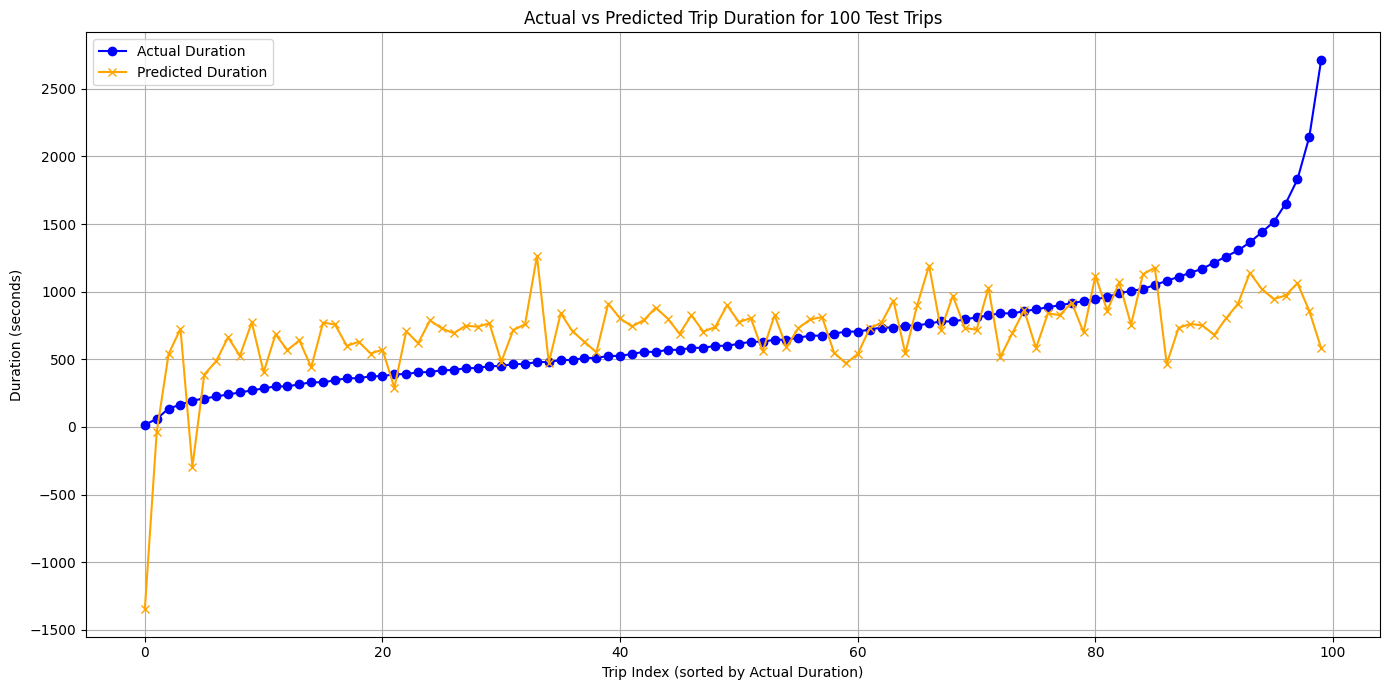

In [59]:
# Combine actual and predicted values into a DataFrame for easier handling
validation_results = pd.DataFrame({
    'Actual_Duration': y_val.reset_index(drop=True)[:len(y_pred_val_plr)],  # Adjust the length of y_val
    'Predicted_Duration': y_pred_val_plr
}).reset_index(drop=True)

# Sort by Actual Duration
validation_results_sorted = validation_results.sort_values(by='Actual_Duration').reset_index(drop=True)

# Sample 100 Equally Spaced Points
sample_size = 100
total_points = len(validation_results_sorted)

# Calculate step size to evenly sample the data
step = max(total_points // sample_size, 1)

# Select indices for sampling
sample_indices = np.arange(0, total_points, step)[:sample_size]

# Extract the sampled data
sampled_validation = validation_results_sorted.iloc[sample_indices].reset_index(drop=True)

# Plot Actual vs Predicted Durations (Line Plot)
plt.figure(figsize=(14, 7))
plt.plot(sampled_validation.index, sampled_validation['Actual_Duration'], label='Actual Duration', color='blue', marker='o')
plt.plot(sampled_validation.index, sampled_validation['Predicted_Duration'], label='Predicted Duration', color='orange', marker='x')
plt.title("Actual vs Predicted Trip Duration for 100 Test Trips")
plt.xlabel("Trip Index (sorted by Actual Duration)")
plt.ylabel("Duration (seconds)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### SVM Model

In [61]:
from sklearn.svm import SVR

# Train SVM Regression model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_split, y_train_split)  # Fit on training data

# Make predictions on the validation set
y_pred_svm = svm_model.predict(X_val)  # Predict on validation data

# Evaluate the model
# Cross-validation
scores = cross_val_score(svm_model, X_train_split, y_train_split, scoring='neg_mean_squared_error', cv=5)
cv_svm = np.sqrt(-scores.mean())

# Evaluate the model on validation data
rmse_svm = np.sqrt(mean_squared_error(y_val, y_pred_svm))
r2_svm = r2_score(y_val, y_pred_svm)
mae_svm = mean_absolute_error(y_val, y_pred_svm)

# Print metrics
print(f"Cross-validated RMSE: {cv_svm:.2f}")
print(f"Validation R-Squared: {r2_svm:.4f}")
print(f"Validation RMSE: {rmse_svm:.2f}")
print(f"Validation MAE: {mae_svm:.2f}")

Cross-validated RMSE: 733.86
Validation R-Squared: -0.0315
Validation RMSE: 734.87
Validation MAE: 336.50


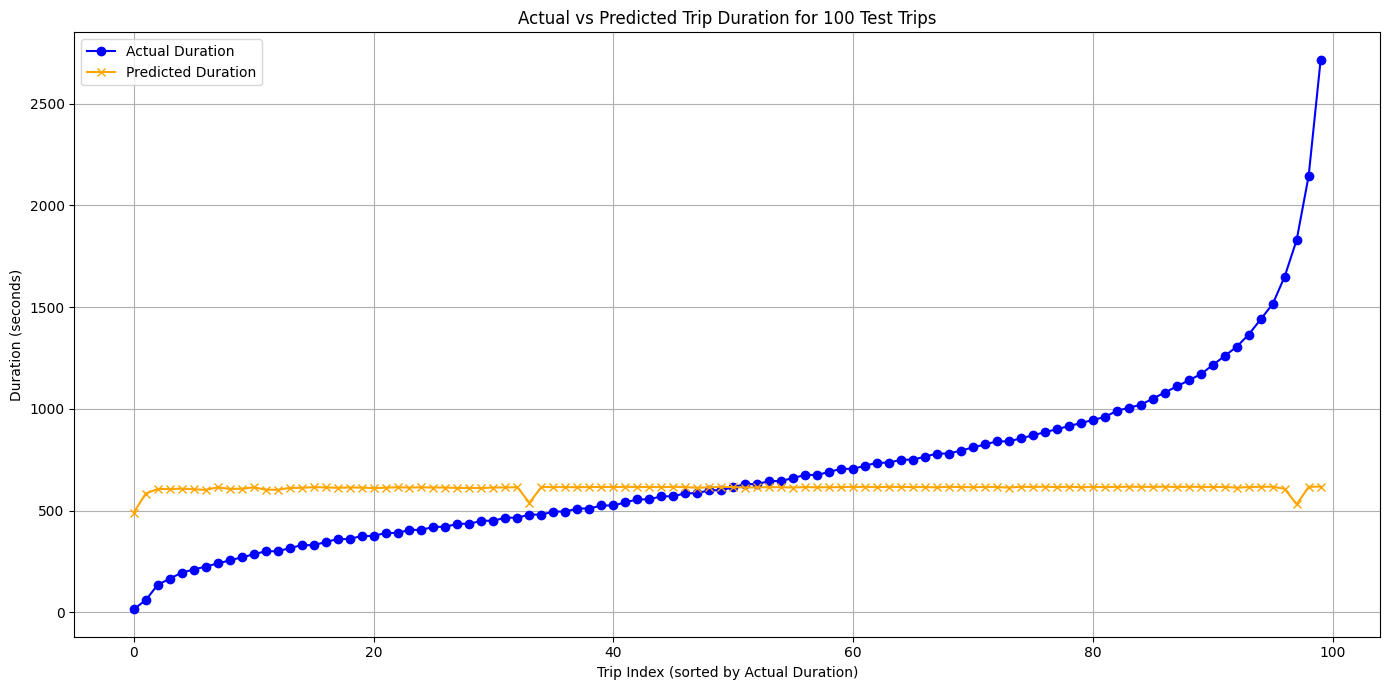

In [62]:
# Combine actual and predicted values into a DataFrame for easier handling
validation_results = pd.DataFrame({
    'Actual_Duration': y_val.reset_index(drop=True)[:len(y_pred_svm)],  # Adjust the length of y_val
    'Predicted_Duration': y_pred_svm
}).reset_index(drop=True)

# Sort by Actual Duration
validation_results_sorted = validation_results.sort_values(by='Actual_Duration').reset_index(drop=True)

# Sample 100 Equally Spaced Points
sample_size = 100
total_points = len(validation_results_sorted)

# Calculate step size to evenly sample the data
step = max(total_points // sample_size, 1)

# Select indices for sampling
sample_indices = np.arange(0, total_points, step)[:sample_size]

# Extract the sampled data
sampled_validation = validation_results_sorted.iloc[sample_indices].reset_index(drop=True)

# Plot Actual vs Predicted Durations (Line Plot)
plt.figure(figsize=(14, 7))
plt.plot(sampled_validation.index, sampled_validation['Actual_Duration'], label='Actual Duration', color='blue', marker='o')
plt.plot(sampled_validation.index, sampled_validation['Predicted_Duration'], label='Predicted Duration', color='orange', marker='x')
plt.title("Actual vs Predicted Trip Duration for 100 Test Trips")
plt.xlabel("Trip Index (sorted by Actual Duration)")
plt.ylabel("Duration (seconds)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# GridSearchCV

In [67]:
from sklearn.preprocessing import RobustScaler

numerical_columns = [
    'START_LAT', 'START_LON', 'HEADING_TO_CENTER',
    'HEADING_FROM_CENTER', 'MEDIAN_VELOCITY',
    'VELOCITY_AT_CUTOFF', 'HEADING_AT_CUTOFF'
]
scaler = RobustScaler()

train[numerical_columns] = scaler.fit_transform(train[numerical_columns])
test[numerical_columns] = scaler.fit_transform(test[numerical_columns])

# I like using the robust scaler. I am not sure if the data has already been scaled
# or if we should use our own scalers in our own models.
# I am skipping the part where I drop the na values and calculate trip duration we have already done that
# We need to create a new complete dataframe after the processing and feature engineering so that we can use that completed one
# to do our own scaling and cross vals


X_train_from_set = train[[
    'START_LAT', 'START_LON', 'HEADING_TO_CENTER',
    'HEADING_FROM_CENTER', 'MEDIAN_VELOCITY',
    'VELOCITY_AT_CUTOFF', 'HEADING_AT_CUTOFF'
]]

y_train_from_set = train['POLYLINE'].apply(lambda x: (len(json.loads(x)) - 1) * 15)

X_testset = test[[
    'START_LAT', 'START_LON', 'HEADING_TO_CENTER',
    'HEADING_FROM_CENTER', 'MEDIAN_VELOCITY',
    'VELOCITY_AT_CUTOFF', 'HEADING_AT_CUTOFF'
]]

test['TRIP_DURATION_ACTUAL'] = test['POLYLINE'].apply(lambda x: (len(json.loads(x)) - 1) * 15)

Y_testset = test['TRIP_DURATION_ACTUAL']

In [68]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
results = []

for k in range(1, 150, 5):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train_from_set, y_train_from_set, cv=5, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores)

    results.append((k, mean_score))

    print(f"k={k}, Neg MSE={mean_score:.4f}")

best_k, best_score = max(results, key=lambda x: x[1])
print(f"Optimal k: {best_k}, Best Neg MSE: {best_score:.4f}")

# This should be done before the KNN so that I use the most optimal value of K when I run the regression
# on the full data. I also need to do this on a sample of the data so that its runtime isn't 8 years long

# I will run this all and debug to ensure that the correct features are included. I will update whichever
# by including in this script the features that I have in my own script.

k=1, Neg MSE=-376114.9997
k=6, Neg MSE=-309084.9917
k=11, Neg MSE=-317839.0479
k=16, Neg MSE=-322271.4139
k=21, Neg MSE=-329544.5497
k=26, Neg MSE=-334228.6098
k=31, Neg MSE=-338899.6082
k=36, Neg MSE=-342639.6761
k=41, Neg MSE=-346122.6460
k=46, Neg MSE=-349521.2009
k=51, Neg MSE=-352300.6604
k=56, Neg MSE=-354575.3117
k=61, Neg MSE=-356805.5169
k=66, Neg MSE=-358662.0838
k=71, Neg MSE=-361088.1570
k=76, Neg MSE=-363135.5139
k=81, Neg MSE=-365338.2521
k=86, Neg MSE=-367068.7978
k=91, Neg MSE=-368734.0081
k=96, Neg MSE=-370350.7028
k=101, Neg MSE=-371547.1393
k=106, Neg MSE=-372905.0383
k=111, Neg MSE=-373916.5477
k=116, Neg MSE=-375336.0421
k=121, Neg MSE=-376810.1899
k=126, Neg MSE=-378180.8418
k=131, Neg MSE=-379288.9463
k=136, Neg MSE=-380355.8079
k=141, Neg MSE=-381452.4948
k=146, Neg MSE=-382555.3311
Optimal k: 6, Best Neg MSE: -309084.9917


# KNN Regression  ####


In [73]:
import ast

knn = KNeighborsRegressor(n_neighbors=best_k)

knn.fit(X_train_from_set, y_train_from_set)

y_pred_knn = knn.predict(X_testset)

rmse_knn = np.sqrt(mean_squared_error(Y_testset, y_pred_knn))
r2_knn = r2_score(Y_testset, y_pred_knn)
mae_knn = mean_absolute_error(Y_testset, y_pred_knn)

print(f"Validation R-Squared: {r2_knn:.4f}")
print(f"Validation RMSE: {rmse_knn:.2f}")
print(f"Validation MAE: {mae_knn:.2f}")



Validation R-Squared: 0.2538
Validation RMSE: 869.41
Validation MAE: 377.25


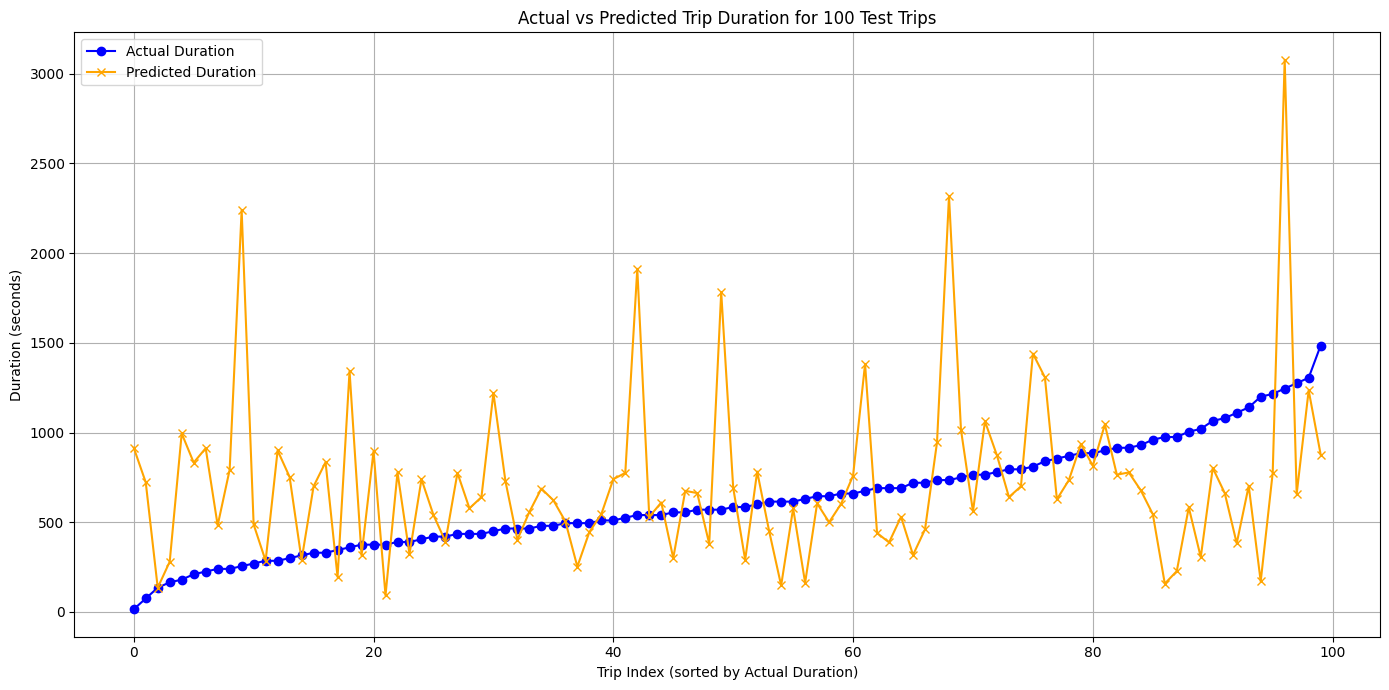

In [74]:
# Combine actual and predicted values into a DataFrame for easier handling
validation_results = pd.DataFrame({
    'Actual_Duration': y_val.reset_index(drop=True)[:len(y_pred_knn)],  # Adjust the length of y_val
    'Predicted_Duration': y_pred_knn
}).reset_index(drop=True)

# Sort by Actual Duration
validation_results_sorted = validation_results.sort_values(by='Actual_Duration').reset_index(drop=True)

# Sample 100 Equally Spaced Points
sample_size = 100
total_points = len(validation_results_sorted)

# Calculate step size to evenly sample the data
step = max(total_points // sample_size, 1)

# Select indices for sampling
sample_indices = np.arange(0, total_points, step)[:sample_size]

# Extract the sampled data
sampled_validation = validation_results_sorted.iloc[sample_indices].reset_index(drop=True)

# Plot Actual vs Predicted Durations (Line Plot)
plt.figure(figsize=(14, 7))
plt.plot(sampled_validation.index, sampled_validation['Actual_Duration'], label='Actual Duration', color='blue', marker='o')
plt.plot(sampled_validation.index, sampled_validation['Predicted_Duration'], label='Predicted Duration', color='orange', marker='x')
plt.title("Actual vs Predicted Trip Duration for 100 Test Trips")
plt.xlabel("Trip Index (sorted by Actual Duration)")
plt.ylabel("Duration (seconds)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Comparison of models

<ipython-input-77-50f9d4deaef8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=df, palette='viridis')


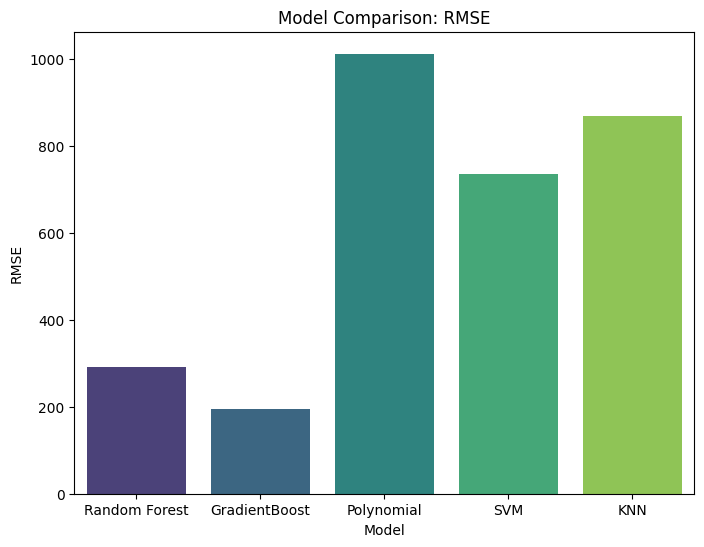

In [77]:

# Model comparison
model_names = ['Random Forest', 'GradientBoost' , 'Polynomial', 'SVM', 'KNN']
predmetrics = [rmse_rf, rmse_gb, rmse_plr, rmse_svm, rmse_knn]  # Replace with your metrics

# Create a DataFrame for plotting
df = pd.DataFrame({'Model': model_names, 'RMSE': predmetrics})
df.to_csv("modelpredictionscores", index=False)

# Plot bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='RMSE', data=df, palette='viridis')
plt.title("Model Comparison: RMSE")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.show()


#### Contributions
* Data Preprocessing and Feature Engineering - Sonam, Dimple and Alex
* Models
  * RandomForest, Gradient Boost - Sonam
  * Linear Regression w/Splines, Polynomial Regression - Dimple
  * KNN - Alex
  * SVM - Vignesh
* Model Evaluation - Sonam, Dimple, Alex and Vignesh
* Model Comparison - Sonam, Dimple, and Alex
* Prediction Excel - Alex, Sonam, Dimple
